# CMP22, CGR4 and KT-19

The following example demonstrates the use of broadband irradiance data collected during ACLOUD and AFLUX. The dataset includes solar and terrestrial broadband irradiance and nadir brightness temperature. The full dataset is available on PANGAEA for ACLOUD and AFLUX.

## Broadband irradiance (CMP22 pyranometer and CGR4 pyrgeometer)

Upward and downward broadband irradiances are measured by pairs of CMP 22 pyranometers and CGR4 pyrgeometers, covering the solar (0.2–3.6 µm) and thermal-infrared (4.5–42 µm) wavelength range, respectively. Data is sampled with a frequency of 20 Hz. In stationary operation, the uncertainty of the sensors is less than 3 %.

## Nadir brightness temperature (KT-19)

Surface brightness temperature was measured by a nadir-looking Kelvin infrared radiation Thermometer (KT-19). These measurements were converted into surface temperature values assuming an emissivity of one. This is justified due to the small impact of atmospheric absorption in the wavelength range of 9.6 to 11.5 µm for which the KT-19 is sensitive. With a sampling frequency of 20 Hz, the KT-19 resolves small scales of the surface temperature heterogeneities, such as observed in the case of leads in sea ice.

More information about the dataset can be found in **[Ehrlich et al. 2019](https://essd.copernicus.org/articles/11/1853/2019/).**

## Data access

* To analyse the data they first have to be loaded by importing the (AC)³airborne meta data catalogue. To do so the ac3airborne package has to be installed. More information on how to do that and about the catalog can be found [here](https://github.com/igmk/ac3airborne-intake#ac3airborne-intake-catalogue).

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

# local caching
kwds = {'simplecache': dict(
    cache_storage=os.environ['INTAKE_CACHE'], 
    same_names=True
)}

## Get data

In [2]:
import ac3airborne

We first want to list the available research flights:

In [3]:
cat = ac3airborne.get_intake_catalog()

datasets = []
for campaign in ['ACLOUD', 'AFLUX']:
    datasets.extend(list(cat[campaign]['P5']['BROADBAND_IRRADIANCE']))
datasets

['ACLOUD_P5_RF04',
 'ACLOUD_P5_RF05',
 'ACLOUD_P5_RF06',
 'ACLOUD_P5_RF07',
 'ACLOUD_P5_RF08',
 'ACLOUD_P5_RF10',
 'ACLOUD_P5_RF11',
 'ACLOUD_P5_RF13',
 'ACLOUD_P5_RF14',
 'ACLOUD_P5_RF15',
 'ACLOUD_P5_RF16',
 'ACLOUD_P5_RF17',
 'ACLOUD_P5_RF18',
 'ACLOUD_P5_RF19',
 'ACLOUD_P5_RF20',
 'ACLOUD_P5_RF21',
 'ACLOUD_P5_RF22',
 'ACLOUD_P5_RF23',
 'ACLOUD_P5_RF25',
 'AFLUX_P5_RF02',
 'AFLUX_P5_RF03',
 'AFLUX_P5_RF04',
 'AFLUX_P5_RF05',
 'AFLUX_P5_RF06',
 'AFLUX_P5_RF07',
 'AFLUX_P5_RF08',
 'AFLUX_P5_RF09',
 'AFLUX_P5_RF10',
 'AFLUX_P5_RF11',
 'AFLUX_P5_RF12',
 'AFLUX_P5_RF13',
 'AFLUX_P5_RF14',
 'AFLUX_P5_RF15']

Then we choose to load the broadband irradiance dataset of a specific flight. In this case we will look at the data of the third research fligth (`RF03`) of the *AFLUX* campaign.

```{note}
Have a look at the attributes of the xarray dataset `ds_broad_irr` for all relevant information on the dataset, such as author, contact, or citation information.
```

In [4]:
ds_broad_irr = cat['AFLUX']['P5']['BROADBAND_IRRADIANCE']['AFLUX_P5_RF03'].to_dask()
import xarray as xr
xr.set_options(display_expand_attrs=False)  
ds_broad_irr

/net/sever/mech/miniconda3/envs/howtoac3/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 15MB
Dimensions:            (Time: 334437)
Dimensions without coordinates: Time
Data variables: (12/14)
    time               (Time) datetime64[ns] 3MB ...
    Lon                (Time) float32 1MB ...
    Lat                (Time) float32 1MB ...
    Alt                (Time) float32 1MB ...
    Solar_F_dw         (Time) float32 1MB ...
    Solar_F_up         (Time) float32 1MB ...
    ...                 ...
    KT19               (Time) float32 1MB ...
    Attitude_Flag      (Time) int8 334kB ...
    Amb_T_Flag         (Time) int8 334kB ...
    Airc_Stab_flag     (Time) int8 334kB ...
    Pyrano_Icing_Flag  (Time) int8 334kB ...
    Pyrgeo_Icing_Flag  (Time) int8 334kB ...
Attributes: (1)

The dataset `ds_broad_irr` includes downward and upward, solar and terrestrial irradiance (`Solar_F_dw`, `Solar_F_up`, `Terr_F_dw` and `Terr_F_up`) and IR brightness temperature in nadir direction (`KT19`). There are also quality flags where data must be interpreted with care or discarded.

```{note}
Please check the attributes of the xarray dataset `ds_broad_irr` for the meaning of the data flags.
```

For some reason, the time variable is not set as a coordinate in the dataset, so we should set it:

In [5]:
ds_broad_irr = ds_broad_irr.assign_coords({"Time": ("Time", ds_broad_irr.time.data)})
ds_broad_irr

<xarray.Dataset> Size: 18MB
Dimensions:            (Time: 334437)
Coordinates:
  * Time               (Time) datetime64[ns] 3MB 2019-03-21T09:52:10.05078125...
Data variables: (12/14)
    time               (Time) datetime64[ns] 3MB 2019-03-21T09:52:10.05078125...
    Lon                (Time) float32 1MB ...
    Lat                (Time) float32 1MB ...
    Alt                (Time) float32 1MB ...
    Solar_F_dw         (Time) float32 1MB ...
    Solar_F_up         (Time) float32 1MB ...
    ...                 ...
    KT19               (Time) float32 1MB ...
    Attitude_Flag      (Time) int8 334kB ...
    Amb_T_Flag         (Time) int8 334kB ...
    Airc_Stab_flag     (Time) int8 334kB ...
    Pyrano_Icing_Flag  (Time) int8 334kB ...
    Pyrgeo_Icing_Flag  (Time) int8 334kB ...
Attributes: (1)

## Load Polar 5 flight phase information¶

Polar 5 flights are divided into segments to easily access start and end times of flight patterns. For more information have a look at the respective [github](https://github.com/igmk/flight-phase-separation) repository.

At first we want to load the flight segments of (AC)³airborne

In [6]:
meta = ac3airborne.get_flight_segments()

In this example we want to look at `AFLUX_P5_RF03`.

In [7]:
flight = meta['AFLUX']['P5']['AFLUX_P5_RF03']

We do not want to look into the data of the whole flight. Instead we want to select a specific portion of the flight, for example a `high_level` leg. In order to simplify things we can import the module `flightphase` from the `ac3airborne.tools`.

In [8]:
from ac3airborne.tools import flightphase as fp

We can now select only the `high_level` legs and show a list of the available legs of this kind.

In [9]:
flight_query = fp.FlightPhaseFile(flight)
queried = flight_query.selectKind(['high_level'])
queried

[{'dropsondes': [],
  'end': datetime.datetime(2019, 3, 21, 10, 44, 51),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9500],
  'name': 'high level 1',
  'segment_id': 'AFLUX_P5_RF03_hl01',
  'start': datetime.datetime(2019, 3, 21, 10, 5, 48)},
 {'dropsondes': [],
  'end': datetime.datetime(2019, 3, 21, 12, 53, 41),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9500],
  'name': 'high level 2',
  'segment_id': 'AFLUX_P5_RF03_hl02',
  'start': datetime.datetime(2019, 3, 21, 12, 44, 57)},
 {'dropsondes': [],
  'end': datetime.datetime(2019, 3, 21, 14, 6, 37),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9500],
  'name': 'high level 3',
  'segment_id': 'AFLUX_P5_RF03_hl03',
  'start': datetime.datetime(2019, 3, 21, 13, 35, 32)}]

We decide to select a specific element of the array:

In [10]:
queried[1]

{'dropsondes': [],
 'end': datetime.datetime(2019, 3, 21, 12, 53, 41),
 'irregularities': [],
 'kinds': ['high_level'],
 'levels': [9500],
 'name': 'high level 2',
 'segment_id': 'AFLUX_P5_RF03_hl02',
 'start': datetime.datetime(2019, 3, 21, 12, 44, 57)}

We will use the start and end time later in order to select the data for the analysis.

In [11]:
start = queried[1]['start']
end   = queried[1]['end']

## Read the GPS information

We now want to read the GPS information, because we want to locate the flight segment and visualize it in a plot:

In [12]:
cat2 = ac3airborne.get_intake_catalog()
ds_gps = cat2['AFLUX']['P5']['GPS_INS']['AFLUX_P5_RF03'].to_dask()
ds_gps

/net/sever/mech/miniconda3/envs/howtoac3/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 1MB
Dimensions:  (time: 18037)
Coordinates:
  * time     (time) datetime64[ns] 144kB 2019-03-21T09:36:00 ... 2019-03-21T1...
Data variables:
    alt      (time) float64 144kB ...
    gs       (time) float64 144kB ...
    lat      (time) float64 144kB ...
    lon      (time) float64 144kB ...
    vs       (time) float64 144kB ...
    pitch    (time) float64 144kB ...
    roll     (time) float64 144kB ...
    heading  (time) float64 144kB ...
Attributes: (15)

## Plots

### Plot the fligt segment

Now we can plot both the whole flight and the flight segment, so that we can show where the measurments have taken place before we plot them.

/net/sever/mech/miniconda3/envs/howtoac3/lib/python3.11/site-packages/shapely/creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)


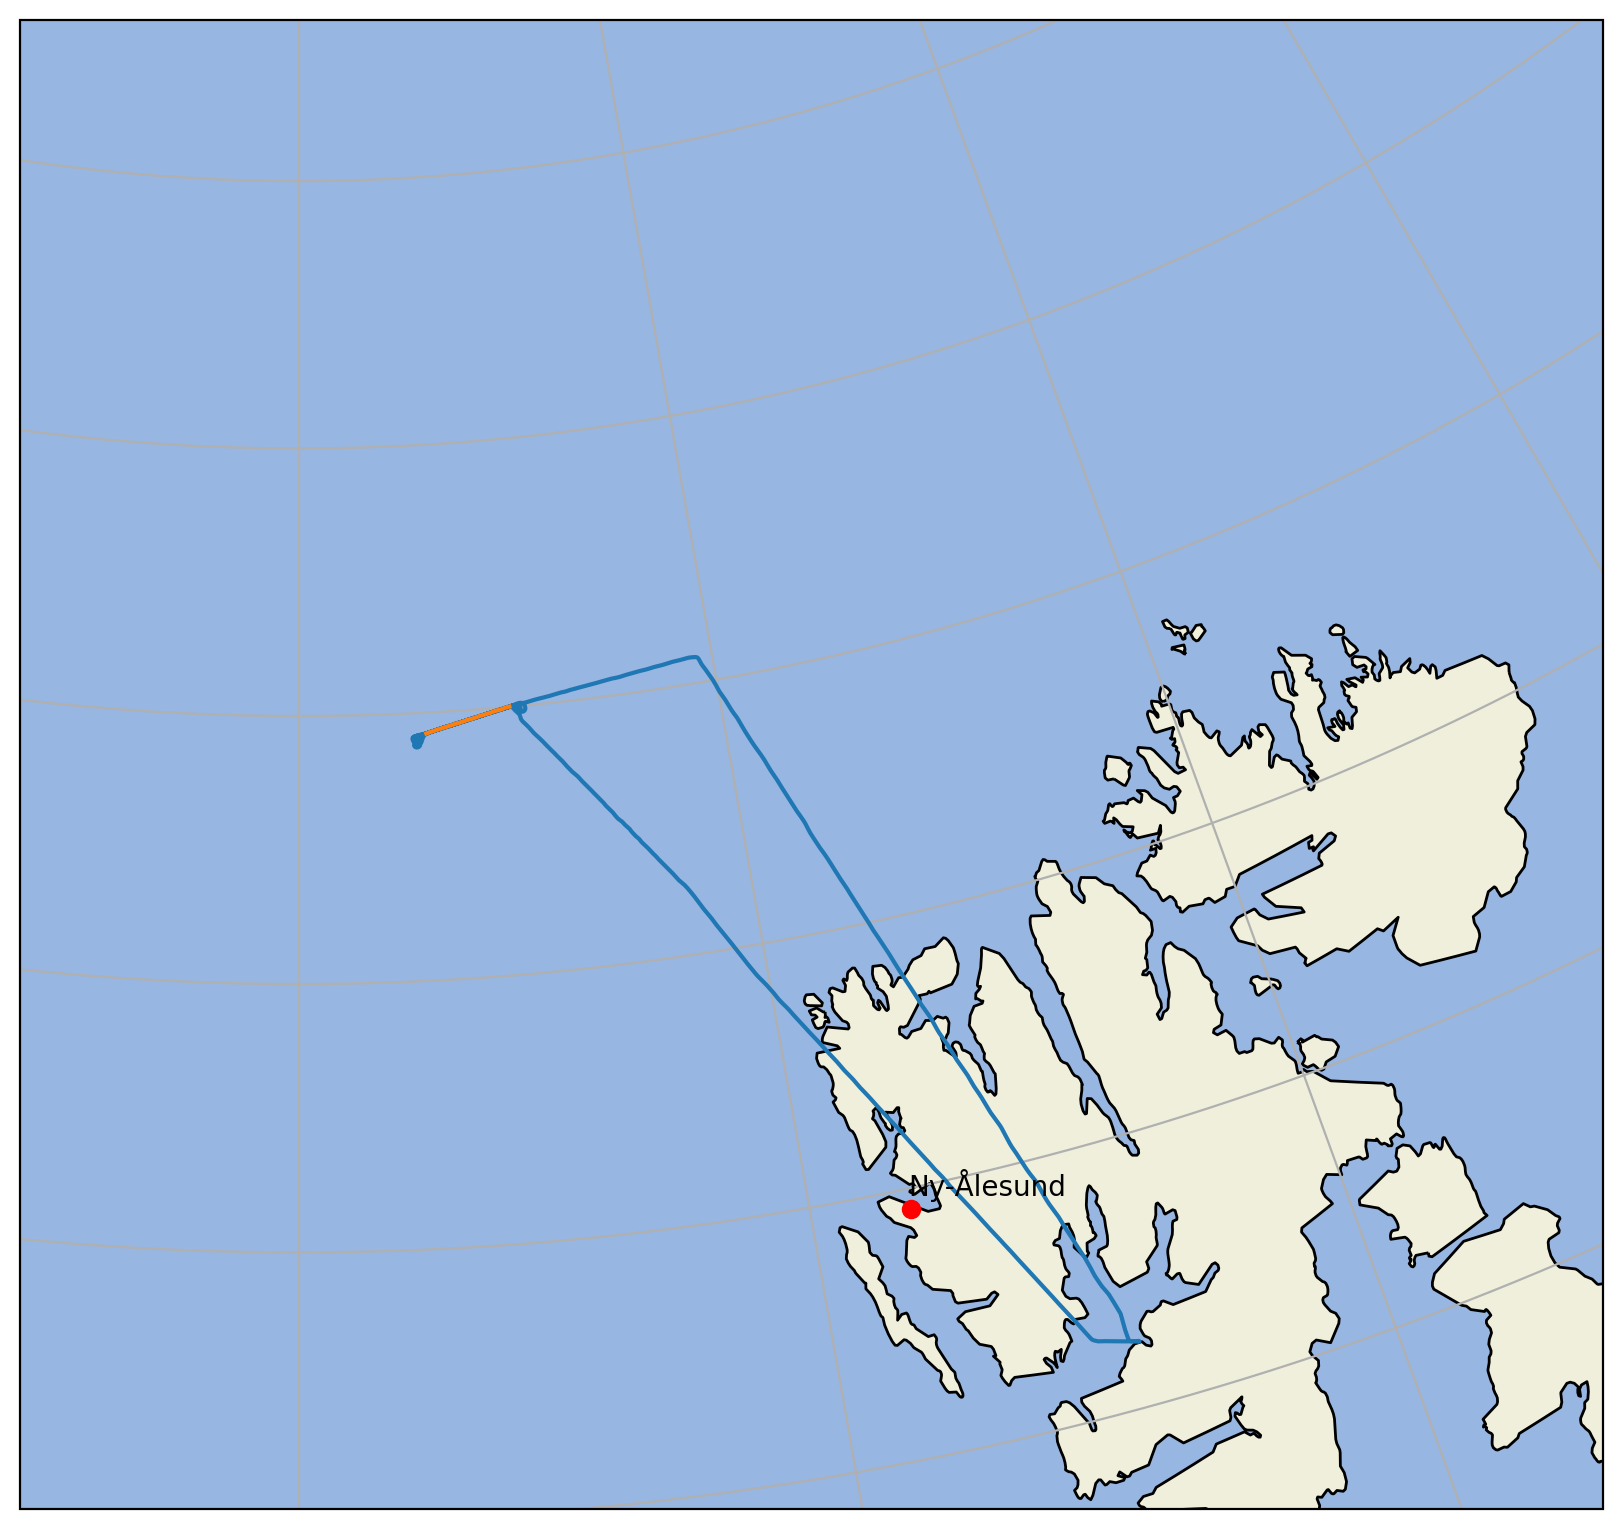

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.style.use("../../mplstyle/book")

proj = ccrs.NorthPolarStereo()
extent = (-5.0, 24.0, 78.0, 83.0)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=proj)
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.gridlines()
ax.coastlines()

nya_lat = 78.924444
nya_lon = 11.928611

ax.plot(nya_lon, nya_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(nya_lon, nya_lat+0.05, 'Ny-Ålesund', transform=ccrs.PlateCarree())

line_all = ax.plot(ds_gps.lon, ds_gps.lat, transform=ccrs.PlateCarree())

line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
               ds_gps.lat.sel(time=slice(start, end)),
               transform=ccrs.PlateCarree())

plt.show()


### Plot the data

We can now select the data and plot it.

In [14]:
time_of_segment = ds_broad_irr.time.sel(Time = slice(start, end))

Solar_F_dw = ds_broad_irr.Solar_F_dw.sel(Time = slice(start, end))
Solar_F_up = ds_broad_irr.Solar_F_up.sel(Time = slice(start, end))
Terr_F_dw  = ds_broad_irr.Terr_F_dw.sel(Time = slice(start, end))
Terr_F_up  = ds_broad_irr.Terr_F_up.sel(Time = slice(start, end))
KT19       = ds_broad_irr.KT19.sel(Time = slice(start, end))

We want to add also some information about ice coverage:

In [15]:
ds_sea_ice = cat['AFLUX']['P5']['AMSR2_SIC']['AFLUX_P5_RF03'].to_dask().sel(time = slice(start, end))

/net/sever/mech/miniconda3/envs/howtoac3/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


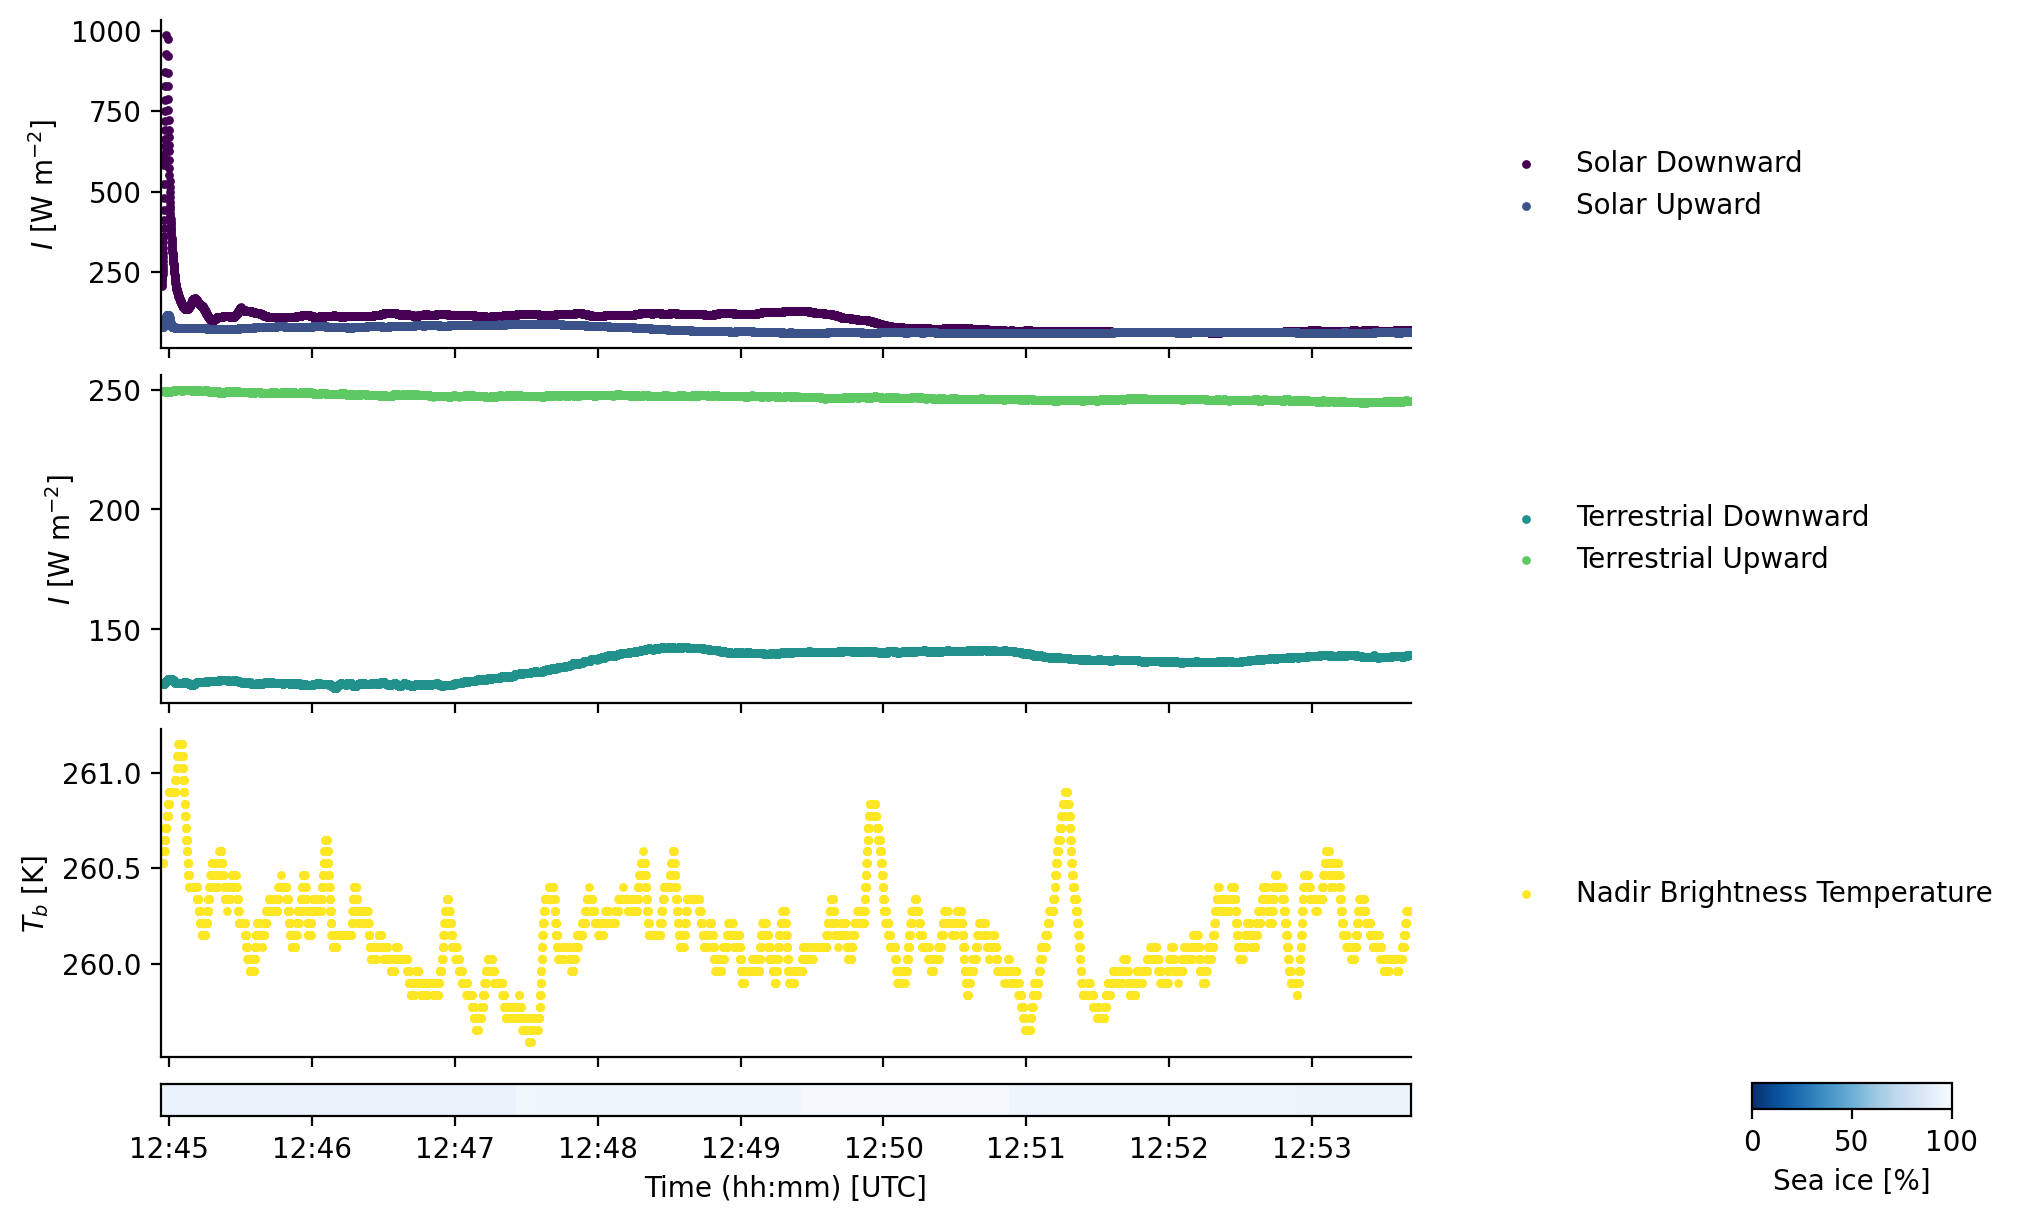

In [16]:
import matplotlib.dates as mdates
from matplotlib import cm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, gridspec_kw=dict(height_ratios=(1, 1, 1, 0.1)))

kwargs = dict(s=10, linewidths=0)
colors = cm.get_cmap('viridis', 5).colors

ax1.scatter(time_of_segment, Solar_F_dw, label='Solar Downward', color=colors[0], **kwargs)
ax1.scatter(time_of_segment, Solar_F_up, label='Solar Upward', color=colors[1], **kwargs)

ax2.scatter(time_of_segment, Terr_F_dw, label='Terrestrial Downward', color=colors[2], **kwargs)
ax2.scatter(time_of_segment, Terr_F_up, label='Terrestrial Upward', color=colors[3], **kwargs)

ax3.scatter(time_of_segment, KT19, label='Nadir Brightness Temperature', color=colors[4], **kwargs)

ax1.legend(frameon=False, bbox_to_anchor=(1.05, 0.5), loc='center left')
ax2.legend(frameon=False, bbox_to_anchor=(1.05, 0.5), loc='center left')
ax3.legend(frameon=False, bbox_to_anchor=(1.05, 0.5), loc='center left')

ax1.set_ylabel('$I$ [W m$^{-2}$]')
ax2.set_ylabel('$I$ [W m$^{-2}$]')
ax3.set_ylabel('$T_b$ [K]')

# plot AMSR2 sea ice concentration
im = ax4.pcolormesh(ds_sea_ice.time,
               np.array([0, 1]),
               np.array([ds_sea_ice.sic,ds_sea_ice.sic]), cmap='Blues_r', vmin=0, vmax=100,
               shading='auto')
cax = fig.add_axes([0.87, 0.085, 0.1, ax4.get_position().height])
fig.colorbar(im, cax=cax, orientation='horizontal', label='Sea ice [%]')
ax4.tick_params(axis='y', labelleft=False, left=False)
#ax4.spines[:].set_visible(True)
ax4.spines['top'].set_visible(True)
ax4.spines['right'].set_visible(True)

ax4.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax4.set_xlabel('Time (hh:mm) [UTC]')

plt.show()